# Weight Sharing with Auxiliary Loss Testing

## Setup

In [1]:
%cd ..

/Users/Niels/Documents/EPFL/Master/DeepLearning/project1


### Imports

In [2]:
import time

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

import models as models
from train import train_with_auxiliary_loss
from evaluation import model_evaluation_with_auxiliary_loss

### Helpers

In [3]:
def parse_round_results(round_results):
    
    train_loss = []
    train_error = []
    test_error = []
    
    
    for tr_loss, tr_err, _, te_err in round_results:
        train_loss.append(tr_loss)
        train_error.append(tr_err)
        test_error.append(te_err)
        
    train_loss = torch.tensor(train_loss)
    train_error = torch.tensor(train_error)
    test_error = torch.tensor(test_error)
    
    # Mean of the values per epoch
    mean_train_loss = train_loss.mean(dim=0)
    mean_train_error = train_error.mean(dim=0)
    mean_test_error = test_error.mean(dim=0)
    
    # Standard deviation of the values per epoch
    std_train_loss = train_loss.std(dim=0)
    std_train_error = train_error.std(dim=0)
    std_test_error = test_error.std(dim=0)
    
    print(f'Model Results:')
    print(f'    Mean Training Loss:  {mean_train_loss[-1]:.2f}')
    print(f'    Mean Training Error: {100 * mean_train_error[-1]:.2f}%')
    print(f'    Mean Testing Error:  {100 * mean_test_error[-1]:.2f}%')
    print()
    print(f'    Training Loss STD:   {std_train_loss[-1]:.4f}')
    print(f'    Training Error STD:  {100 * std_train_error[-1]:.2f}')
    print(f'    Testing Error STD:   {100 * std_test_error[-1]:.2f}')
    
    plt.figure(figsize=(15, 5))
    plt.title('Model Training Loss')
    plt.xlabel('EPOCH')
    plt.ylabel('LOSS')
    plt.grid()
    plt.plot(range(1, len(mean_train_loss) + 1), mean_train_loss)
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.title('Model Error Rate')
    plt.xlabel('EPOCH')
    plt.ylabel('ERROR RATE (%)')
    plt.grid()
    plt.plot(range(1, len(mean_train_error) + 1), mean_train_error, label='Mean Training Error')
    plt.plot(range(1, len(mean_train_error) + 1), mean_test_error, label='Mean Test Error')
    plt.legend()
    plt.show()

## Model Testing

In [4]:
def weight_sharing_aux_loss():
    """ Generates the first baseline """
    model = models.WeightSharingAuxLossCNN(hidden_layer_units=50)
    criterion = torch.nn.CrossEntropyLoss()
    aux_criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())
    return model, criterion, aux_criterion, optimizer
    
    
model, _, _, _ = weight_sharing_aux_loss()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Model Parameters: {num_params}')

model

Model Parameters: 50454


WeightSharingAuxLossCNN(
  (lenet): CustomLeNet5(
    (conv_layer_1): Sequential(
      (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (conv_layer_2): Sequential(
      (0): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Sequential(
      (0): Linear(in_features=288, out_features=120, bias=True)
      (1): ReLU()
      (2): Linear(in_features=120, out_features=84, bias=True)
      (3): ReLU()
      (4): Linear(in_features=84, out_features=10, bias=True)
    )
  )
  (classifier): MLPClassifier(
    (fc1): Linear(in_features=20, out_features=50, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=50, out_features=2, bias=True)
  )
)

### Auxiliary Weight 0.5

In [5]:
aux_loss_weight = 0.5

rounds = 5
epochs = 25
batch_size = 25
seed = 0

round_results_aux_05 = model_evaluation_with_auxiliary_loss(
    weight_sharing_aux_loss, train_with_auxiliary_loss, aux_loss_weight,
    rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   9.40%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   10.50%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   11.10%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.90%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.30%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.00
    Mean Training Error: 0.00%
    Mean Testing Error:  9.64%

    Training Loss STD:   0.0000
    Training Error STD:  0.00
    Testing Error STD:   1.15


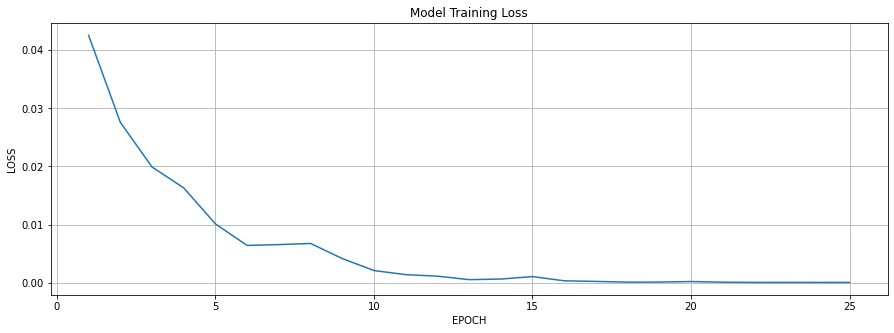

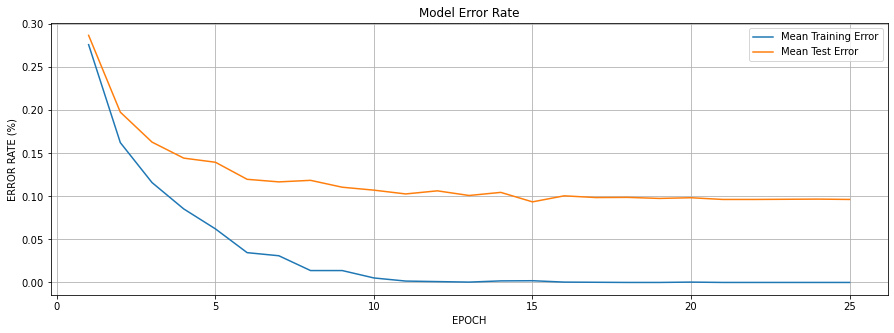

In [6]:
parse_round_results(round_results_aux_05)

### Auxiliary Weight 1

In [7]:
aux_loss_weight = 1.0

rounds = 5
epochs = 25
batch_size = 25
seed = 0

round_results_aux_10 = model_evaluation_with_auxiliary_loss(
    weight_sharing_aux_loss, train_with_auxiliary_loss, aux_loss_weight,
    rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   9.80%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.90%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   10.90%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   9.60%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   10.00%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.00
    Mean Training Error: 0.00%
    Mean Testing Error:  9.84%

    Training Loss STD:   0.0000
    Training Error STD:  0.00
    Testing Error STD:   0.72


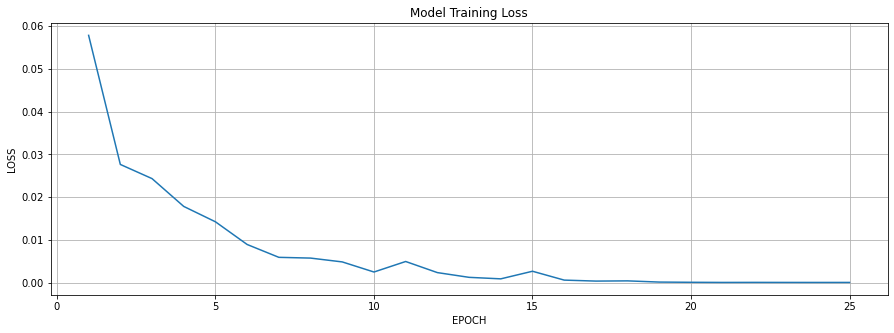

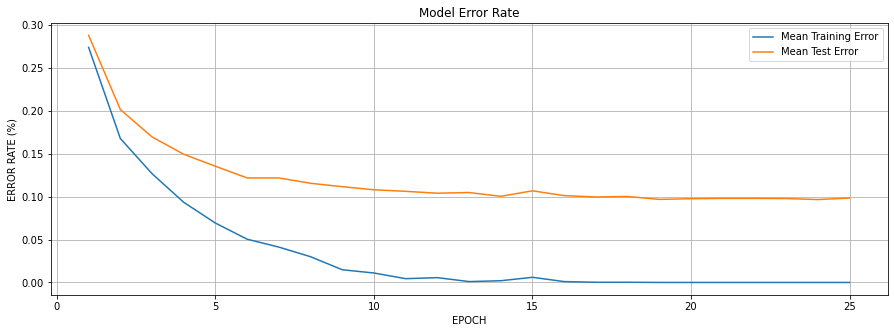

In [8]:
parse_round_results(round_results_aux_10)

### Auxiliary Weight 2

In [9]:
aux_loss_weight = 2.0

rounds = 5
epochs = 25
batch_size = 25
seed = 0

round_results_weight_20 = model_evaluation_with_auxiliary_loss(
    weight_sharing_aux_loss, train_with_auxiliary_loss, aux_loss_weight,
    rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   9.00%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.30%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   7.60%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   9.60%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.00%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.00
    Mean Training Error: 0.00%
    Mean Testing Error:  8.50%

    Training Loss STD:   0.0001
    Training Error STD:  0.00
    Testing Error STD:   0.80


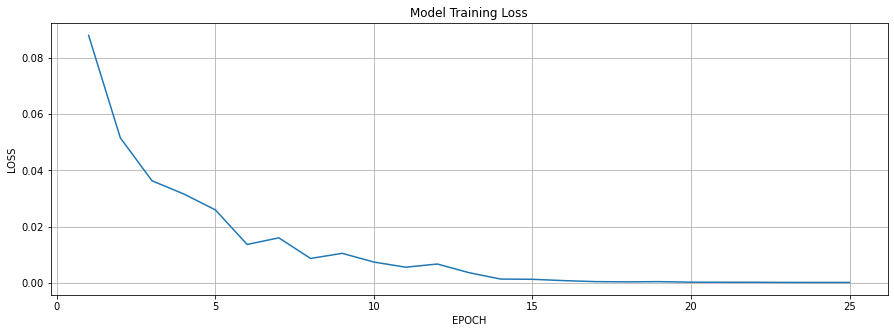

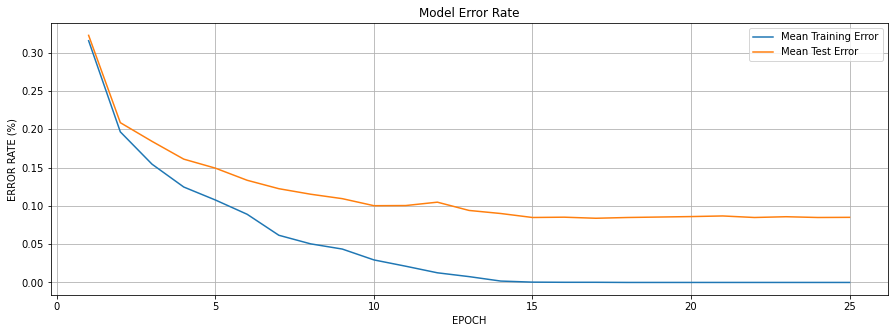

In [10]:
parse_round_results(round_results_weight_20)

### Auxiliary Weight 5

In [11]:
aux_loss_weight = 5.0

rounds = 5
epochs = 25
batch_size = 25
seed = 0

round_results_weight_50 = model_evaluation_with_auxiliary_loss(
    weight_sharing_aux_loss, train_with_auxiliary_loss, aux_loss_weight,
    rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   7.40%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   7.10%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.10%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   7.70%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.000
  Train Error Rate:  0.00%
  Test Error Rate:   8.10%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.00
    Mean Training Error: 0.00%
    Mean Testing Error:  7.68%

    Training Loss STD:   0.0001
    Training Error STD:  0.00
    Testing Error STD:   0.44


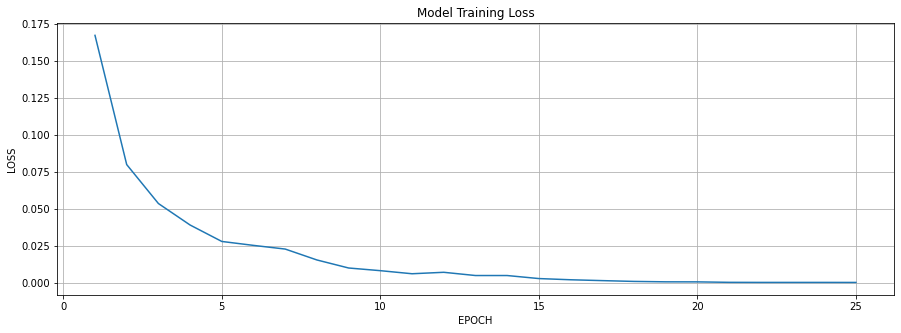

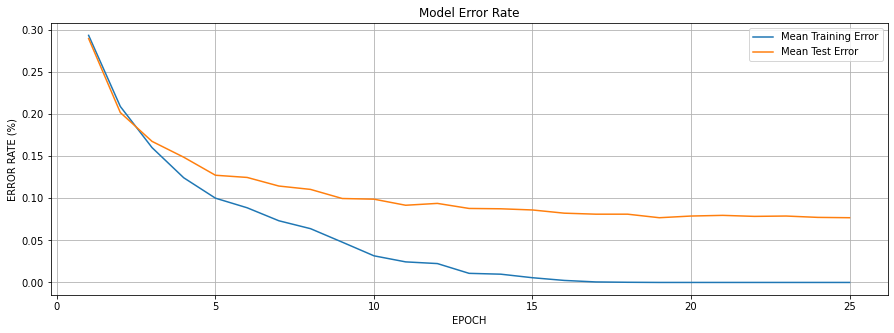

In [12]:
parse_round_results(round_results_weight_50)

### Auxiliary Weight 10

In [13]:
aux_loss_weight = 10.0

rounds = 5
epochs = 25
batch_size = 25
seed = 0

round_results_weight_100 = model_evaluation_with_auxiliary_loss(
    weight_sharing_aux_loss, train_with_auxiliary_loss, aux_loss_weight,
    rounds, epochs, batch_size, seed=seed)

Round 1
Test results:
  Train Loss:       0.001
  Train Error Rate:  0.00%
  Test Error Rate:   6.60%
-------------------------------------------------- 

Round 2
Test results:
  Train Loss:       0.001
  Train Error Rate:  0.00%
  Test Error Rate:   9.30%
-------------------------------------------------- 

Round 3
Test results:
  Train Loss:       0.001
  Train Error Rate:  0.00%
  Test Error Rate:   7.50%
-------------------------------------------------- 

Round 4
Test results:
  Train Loss:       0.001
  Train Error Rate:  0.00%
  Test Error Rate:   7.90%
-------------------------------------------------- 

Round 5
Test results:
  Train Loss:       0.001
  Train Error Rate:  0.00%
  Test Error Rate:   8.20%
-------------------------------------------------- 



Model Results:
    Mean Training Loss:  0.00
    Mean Training Error: 0.00%
    Mean Testing Error:  7.90%

    Training Loss STD:   0.0002
    Training Error STD:  0.00
    Testing Error STD:   0.99


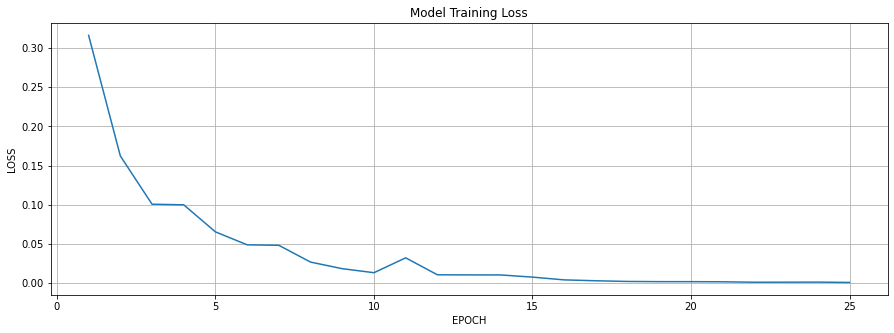

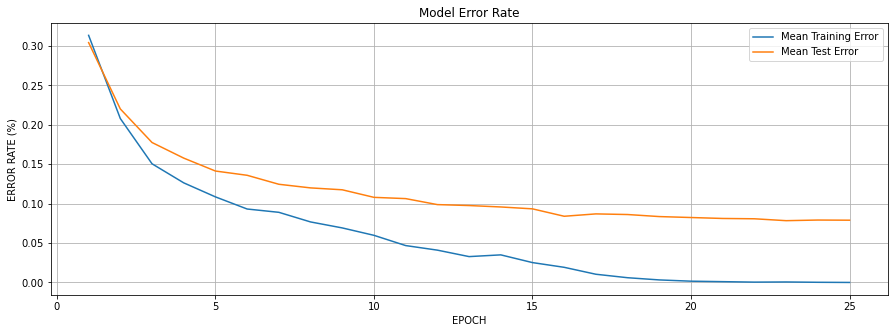

In [14]:
parse_round_results(round_results_weight_100)